In [33]:
import pysd
import pandas as pd 
from matplotlib import pyplot as plt

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [35]:
import numpy as np

In [36]:
# read sd log
df = pd.read_csv('/Users/robin/GitLab/thesis/data/BPI2012/Active2012_1D_sdlog.csv')
df.index +=1 # start the index from 1 for further simulating 

In [37]:
df.head()

Arrival rate1D  Finish rate1D  Num of unique resource1D  \
1              43             31                        39   
2              50             29                        38   
3             107            101                        40   
4              83             85                        42   
5             126            111                        41   

   Process active time1D  Service time per case1D  Time in process per case1D  \
1           10199.383333              3284.688889                  242.842460   
2           10678.516667              3110.885034                  217.928912   
3           20380.683333              2671.339706                  199.810621   
4           18983.550000              2891.513992                  234.364815   
5           29753.266667              2689.066949                  252.146328   

   Waiting time in process per case1D  Num in process case1D  
1                        -3041.846429                   12.0  
2                        -2892.956122                   33.0  
3                        -2471.529085                   39.0  
4                        -2657.149177                   37.0  
5                        -2436.920621                   52.0

In [38]:
df.shape

(152, 8)

In [39]:
df.columns

Index(['Arrival rate1D', 'Finish rate1D', 'Num of unique resource1D',
       'Process active time1D', 'Service time per case1D',
       'Time in process per case1D', 'Waiting time in process per case1D',
       'Num in process case1D'],
      dtype='object')

In [40]:
data = df[['Arrival rate1D', 'Finish rate1D', 'Num of unique resource1D',
       'Process active time1D', 'Service time per case1D',
       'Time in process per case1D',
       'Num in process case1D']]

In [1]:
# data = df[['price_usd', 'srch_booking_window', 'srch_saturday_night_bool']]
# scaler = StandardScaler()
# np_scaled = scaler.fit_transform(data)
# data = pd.DataFrame(np_scaled)
# # train isolation forest
# model =  IsolationForest(contamination=0.05)
# model.fit(data) 
# df['anomaly2'] = pd.Series(model.predict(data))

# # visualization
# fig, ax = plt.subplots(figsize=(10,6))

# a = df.loc[df['anomaly2'] == -1, ['Process active time1D']] #anomaly

# ax.plot(range(len(df)), df['Process active time1D'], color='blue', label = 'Normal')
# ax.scatter(list(a.index), a['Process active time1D'], color='red', label = 'Anomaly')
# plt.legend()
# plt.show();

In [31]:
list(a.index)

[40, 47, 82, 84, 85, 89, 91, 93]

In [6]:
df['Time in process per case1D'] - df['Service time per case1D']

1     -3041.846429
2     -2892.956122
3     -2471.529085
4     -2657.149177
5     -2436.920621
          ...     
148   -1090.697945
149   -1144.774755
150    -960.858333
151    -860.874638
152    -677.754198
Length: 152, dtype: float64

In [43]:
model = pysd.read_vensim('/Users/robin/GitLab/thesis/test/demo_sdm_1d.mdl')

In [45]:
model.py_model_file

'/Users/robin/GitLab/thesis/test/demo_sdm_1d.py'

In [46]:
model.mdl_file

'/Users/robin/GitLab/thesis/test/demo_sdm_1d.mdl'

In [53]:
um = pysd.load('/Users/robin/GitLab/thesis/test/updated_model.py')

In [54]:
um.py_model_file

'/Users/robin/GitLab/thesis/test/updated_model.py'

In [55]:
um.mdl_file

AttributeError: 'Model' object has no attribute 'mdl_file'

In [56]:
teacup = pysd.read_vensim('/Users/robin/GitLab/thesis/test/Teacup.mdl')

In [60]:
teacup.mdl_file

'/Users/robin/GitLab/thesis/test/Teacup.mdl'

In [57]:
tea_model = pysd.load('/Users/robin/GitLab/thesis/test/Teacup.py')

In [61]:
tea_model.mdl_file

AttributeError: 'Model' object has no attribute 'mdl_file'

In [28]:
model.doc()

Real Name                             Py Name  \
0                       Arrival rate1D                      arrival_rate1d   
1                           FINAL TIME                          final_time   
2                        Finish rate1D                       finish_rate1d   
3                         INITIAL TIME                        initial_time   
4                Num in process case1D               num_in_process_case1d   
5             Num of unique resource1D            num_of_unique_resource1d   
6                Process active time1D               process_active_time1d   
7                              SAVEPER                             saveper   
8              Service time per case1D             service_time_per_case1d   
9                            TIME STEP                           time_step   
10          Time in process per case1D          time_in_process_per_case1d   
11  Waiting time in process per case1D  waiting_time_in_process_per_case1d   

      Unit          Lims       Type  \
0      b''  (None, None)   constant   
1   b'Day'  (None, None)   constant   
2      b''  (None, None)  component   
3   b'Day'  (None, None)   constant   
4      b''  (None, None)  component   
5      b''  (None, None)   constant   
6      b''  (None, None)  component   
7   b'Day'   (0.0, None)  component   
8      b''  (None, None)  component   
9   b'Day'   (0.0, None)   constant   
10     b''  (None, None)  component   
11     b''  (None, None)   constant   

                                                  Eqn  \
0                                                b'1'   
1                                               b'33'   
2                     b'1.5*Num of unique resource1D'   
3                                                b'1'   
4         b'INTEG ( Arrival rate1D-Finish rate1D, 1)'   
5                                               b'50'   
6          b'-1.5*Waiting time in process per case1D'   
7                                        b'TIME STEP'   
8   b'-1.3*Finish rate1D-0.7*Num of unique resourc...   
9                                                b'1'   
10  b'1.2*Arrival rate1D-0.8*Num of unique resourc...   
11                                               b'0'   

                                          Comment  
0                                             b''  
1           b'The final time for the simulation.'  
2                                             b''  
3         b'The initial time for the simulation.'  
4                                             b''  
5                                             b''  
6                                             b''  
7   b'The frequency with which output is stored.'  
8                                             b''  
9            b'The time step for the simulation.'  
10                                            b''  
11                                            b''

In [26]:
model.py_model_file

CalculateDuration.ipynb
Convert2Sdlog.ipynb
ML_Preparation.ipynb
PR_test.ipynb
Untitled.ipynb
__pycache__/
bptk_py.log
chunk_1.txt
feature_extracter.ipynb
for_removing_cycles.ipynb
for_writing.ipynb
get_sd_models.ipynb
in_depth_simple_python_library_sd_dsl.ipynb*
introduction_sd_sddsl.ipynb
loop_detecter.ipynb
modified_demo_smd.py
new_demo.ipynb
pysd_demo.ipynb
simulation_visualization.ipynb
temp.py
test.py
test.txt
ttest.py
x_backup.py


In [9]:
data_arrival_rate = df['Arrival rate2H']
data_num_of_resource = df['Num of unique resource2H']

KeyError: 'Arrival rate2H'

In [16]:
model.set_components(params={'Arrival rate':data_arrival_rate,'Num of unique resource':data_num_of_resource})

In [14]:
dummy_stock = model.run()

In [15]:
model.doc()

Real Name                           Py Name  \
0                       Arrival rate                      arrival_rate   
1                         FINAL TIME                        final_time   
2                        Finish rate                       finish_rate   
3                       INITIAL TIME                      initial_time   
4            Num in process per case           num_in_process_per_case   
5             Num of unique resource            num_of_unique_resource   
6                Process active time               process_active_time   
7                            SAVEPER                           saveper   
8              Service time per case             service_time_per_case   
9                          TIME STEP                         time_step   
10          Time in process per case          time_in_process_per_case   
11  Waiting time in process per case  waiting_time_in_process_per_case   

      Unit          Lims       Type  \
0      b''  (None, None)   constant   
1   b'Day'  (None, None)   constant   
2      b''  (None, None)  component   
3   b'Day'  (None, None)   constant   
4      b''  (None, None)  component   
5      b''  (None, None)   constant   
6      b''  (None, None)  component   
7   b'Day'   (0.0, None)  component   
8      b''  (None, None)  component   
9   b'Day'   (0.0, None)   constant   
10     b''  (None, None)  component   
11     b''  (None, None)   constant   

                                                  Eqn  \
0                                                b'1'   
1                                               b'33'   
2                       b'1.5*Num of unique resource'   
3                                                b'1'   
4             b'INTEG ( Arrival rate-Finish rate, 1)'   
5                                               b'50'   
6            b'-1.5*Waiting time in process per case'   
7                                        b'TIME STEP'   
8   b'-1.3*Finish rate-0.7*Num of unique resource+...   
9                                                b'1'   
10  b'1.2*Arrival rate-0.8*Num of unique resource+...   
11                                               b'0'   

                                          Comment  
0                                             b''  
1           b'The final time for the simulation.'  
2                                             b''  
3         b'The initial time for the simulation.'  
4                                             b''  
5                                             b''  
6                                             b''  
7   b'The frequency with which output is stored.'  
8                                             b''  
9            b'The time step for the simulation.'  
10                                            b''  
11                                            b''

In [16]:
dummy_stock

TIME  Process active time  Waiting time in process per case  \
1.0    1.0                 -0.0                                 0   
2.0    2.0                 -0.0                                 0   
3.0    3.0                 -0.0                                 0   
4.0    4.0                 -0.0                                 0   
5.0    5.0                 -0.0                                 0   
6.0    6.0                 -0.0                                 0   
7.0    7.0                 -0.0                                 0   
8.0    8.0                 -0.0                                 0   
9.0    9.0                 -0.0                                 0   
10.0  10.0                 -0.0                                 0   
11.0  11.0                 -0.0                                 0   
12.0  12.0                 -0.0                                 0   
13.0  13.0                 -0.0                                 0   
14.0  14.0                 -0.0                                 0   
15.0  15.0                 -0.0                                 0   
16.0  16.0                 -0.0                                 0   
17.0  17.0                 -0.0                                 0   
18.0  18.0                 -0.0                                 0   
19.0  19.0                 -0.0                                 0   
20.0  20.0                 -0.0                                 0   
21.0  21.0                 -0.0                                 0   
22.0  22.0                 -0.0                                 0   
23.0  23.0                 -0.0                                 0   
24.0  24.0                 -0.0                                 0   
25.0  25.0                 -0.0                                 0   
26.0  26.0                 -0.0                                 0   
27.0  27.0                 -0.0                                 0   
28.0  28.0                 -0.0                                 0   
29.0  29.0                 -0.0                                 0   
30.0  30.0                 -0.0                                 0   
31.0  31.0                 -0.0                                 0   
32.0  32.0                 -0.0                                 0   
33.0  33.0                 -0.0                                 0   

      Time in process per case  Service time per case  Finish rate  \
1.0                      -38.8                -179.06         75.0   
2.0                      -38.8                -179.06         75.0   
3.0                      -38.8                -179.06         75.0   
4.0                      -38.8                -179.06         75.0   
5.0                      -38.8                -179.06         75.0   
6.0                      -38.8                -179.06         75.0   
7.0                      -38.8                -179.06         75.0   
8.0                      -38.8                -179.06         75.0   
9.0                      -38.8                -179.06         75.0   
10.0                     -38.8                -179.06         75.0   
11.0                     -38.8                -179.06         75.0   
12.0                     -38.8                -179.06         75.0   
13.0                     -38.8                -179.06         75.0   
14.0                     -38.8                -179.06         75.0   
15.0                     -38.8                -179.06         75.0   
16.0                     -38.8                -179.06         75.0   
17.0                     -38.8                -179.06         75.0   
18.0                     -38.8                -179.06         75.0   
19.0                     -38.8                -179.06         75.0   
20.0                     -38.8                -179.06         75.0   
21.0                     -38.8                -179.06         75.0   
22.0                     -38.8                -179.06         75.0   
23.0                     -38.8                -17

In [17]:
for i in model.doc()['Eqn']:
    print(i)

b'1'
b'33'
b'1.5*Num of unique resource'
b'1'
b'INTEG ( Arrival rate-Finish rate, 1)'
b'50'
b'-1.5*Waiting time in process per case'
b'TIME STEP'
b'-1.3*Finish rate-0.7*Num of unique resource+1.2*Time in process per case+0.1*Process active time'
b'1'
b'1.2*Arrival rate-0.8*Num of unique resource+0.01*Process active time'
b'0'


In [13]:
name_relation = dict(zip(model.doc()['Real Name'],model.doc()['Py Name']))

In [14]:
name_relation

{'Arrival rate1D': 'arrival_rate1d',
 'FINAL TIME': 'final_time',
 'Finish rate1D': 'finish_rate1d',
 'INITIAL TIME': 'initial_time',
 'Num in process case1D': 'num_in_process_case1d',
 'Num of unique resource1D': 'num_of_unique_resource1d',
 'Process active time1D': 'process_active_time1d',
 'SAVEPER': 'saveper',
 'Service time per case1D': 'service_time_per_case1d',
 'TIME STEP': 'time_step',
 'Time in process per case1D': 'time_in_process_per_case1d',
 'Waiting time in process per case1D': 'waiting_time_in_process_per_case1d'}

In [48]:
# get from the framwork 
# dis_euqs = {'Finish rate':'0.953*Arrival rate+1.147*Num of unique resource-21.616-22.3',
#             'Service time per case':'-3.104*Finish rate+12.362*Time in process per case+66.402*Num of unique resource-2755.11',
#             'Time in process per case':'-1.003*Arrival rate-1.505*Num of unique resource+191.804+167'}

In [129]:
# DATA : 2012_1D
# dis_euqs = {'Finish rate':'0.953 * Arrival rate + 1.147 * Num of unique resource -22.3-21.616',
#             'Service time per case':'-3.104 * Finish rate + 66.402 * Num of unique resource + 12.362 * Time in process per case-2755.106',
#             'Time in process per case':'-1.003 * Arrival rate -1.505 * Num of unique resource + 84.991 + 82.707+191.804'}

In [81]:
0.021* np.mean(df['Process active time7D'])

2493.4951522727274

In [45]:
# DATA : 2012_Active_2H
dis_euqs = {
    'Finish rate' : '-0.114 * Num of unique resource -0.848 + 0.077 * Num in process per case+3.123',
    'Service time per case': '-71.675 * Arrival rate + 13.559 * Finish rate + 125.054 * Num of unique resource -796.427 + 2642.653-1009.801',
    'Time in process per case':'-8.649 * Arrival rate + -0.844 * Finish rate + -1.071 * Num of unique resource +96.383+ 0.038 * Service time per case + -0.203 * Num in process per case+136.863'
    
}

In [54]:
# DATA : 2017_GEN_8H
dis_euqs = {
    'Finish rate': '0.358*Arrival rate-1.189*Num of unique resource+3.827-0.027*Time in process per case+0.073*Num in process per case+23.818',
    'Service time per case':'-36.255*Arrival rate+13.151*Finish rate+57.77*Num of unique resource+51.557+7.532*Time in process per case-0.568 * Num in process per case-992.842',
    'Time in process per case':'-7.724*Arrival rate+3.801*Num of unique resource-12.281+114.572+61.235+178.659'
}


In [30]:
# DATA :2017_Active_7D
dis_euqs = {
    'Finish rate':'0.719 * Arrival rate + 0.012 * Num of unique resource -0.003 * Process active time+ 0.034 * Service time per case + 0.203 * Time in process per case + 1.255 * Num in process per case+17.735',
    'Service time per case': '-3.124 * Arrival rate +0.021*Process active time+843.795',
    'Time in process per case':'-0.662 * Arrival rate + 0.002 * Process active time+288.727'
}

In [59]:
0.001*np.mean(df['Waiting time in process per case1H'])

0.0024143602693602697

In [10]:
# DATA :test_active_1h
dis_euqs = {
    'Finish rate': '0.062 * Arrival rate+125.457',
    'Process active time':'10.339 * Num of unique resource + 153.685 -1.564 * Waiting time in process per case-62.056',
    'Service time per case':'-0.085 * Num of unique resource + 2.497 -1.0 * Waiting time in process per case+0.512',
    'Time in process per case':'-0.164 * Num of unique resource + 0.017 * Process active time + 0.012 * Service time per case+ 0.002+0.985',
}

In [22]:
# PageRank based equations
dis_euqs = {
    'Finish rate': '0.358*Arrival rate-1.189*Num of unique resource+3.827-7.437+0.073*Num in process per case+23.818',
    'Service time per case':'-36.255*Arrival rate+13.151*Finish rate+57.77*Num of unique resource+51.557+2074.567-0.568 * Num in process per case-992.842',
    'Time in process per case':'-7.724*Arrival rate-0.603*Finish rate+3.801*Num of unique resource+114.572+0.032*Service time per case+178.659'
}

In [12]:
# slightly modify the function to suit the py file
ans = {}
for key, val in dis_euqs.items():
    for k in name_relation.keys():
        if k in val:
            val = val.replace(k,'{}()'.format(name_relation[k]))
    ans[name_relation[key]] = val

NameError: name 'name_relation' is not defined

In [22]:
ans

{'finish_rate': '0.062 * arrival_rate()+125.457',
 'process_active_time': '10.339 * num_of_unique_resource() + 153.685 -1.564 * waiting_time_in_process_per_case()-62.056',
 'service_time_per_case': '-0.085 * num_of_unique_resource() + 2.497 -1.0 * waiting_time_in_process_per_case()+0.512',
 'time_in_process_per_case': '-0.164 * num_of_unique_resource() + 0.017 * process_active_time() + 0.012 * service_time_per_case()+ 0.002+0.985'}

In [11]:
# update euqations by modifing the py file
with open('modified_demo_smd.py','w') as m:
    with open('/Users/robin/GitLab/thesis/sdm/demo_sdm.py','r') as f:
        lines= f.readlines()
        for i in range(0,len(lines)):
            line = lines[i]
            for var,equ in ans.items():
                if 'def {}():'.format(var) in line:
                    lines[i+3] = "Original Eqn: b'{}'\n".format(equ)
                    lines[i+10] = '    return {}'.format(equ)
            m.writelines(line)

NameError: name 'ans' is not defined

In [47]:
um = pysd.load('/Users/robin/GitLab/thesis/test/updated_model.py')
um.mdl_file

AttributeError: 'Model' object has no attribute 'mdl_file'

In [25]:
updated_model = pysd.load('/Users/robin/GitLab/thesis/code/modified_demo_smd.py')

In [26]:
updated_model.doc()

Real Name                           Py Name  \
0                       Arrival rate                      arrival_rate   
1                         FINAL TIME                        final_time   
2                        Finish rate                       finish_rate   
3                       INITIAL TIME                      initial_time   
4            Num in process per case           num_in_process_per_case   
5             Num of unique resource            num_of_unique_resource   
6                Process active time               process_active_time   
7                            SAVEPER                           saveper   
8              Service time per case             service_time_per_case   
9                          TIME STEP                         time_step   
10          Time in process per case          time_in_process_per_case   
11  Waiting time in process per case  waiting_time_in_process_per_case   

      Unit          Lims       Type  \
0      b''  (None, None)   constant   
1   b'Day'  (None, None)   constant   
2      b''  (None, None)  component   
3   b'Day'  (None, None)   constant   
4      b''  (None, None)  component   
5      b''  (None, None)   constant   
6      b''  (None, None)  component   
7   b'Day'   (0.0, None)  component   
8      b''  (None, None)  component   
9   b'Day'   (0.0, None)   constant   
10     b''  (None, None)  component   
11     b''  (None, None)   constant   

                                                  Eqn  \
0                                                b'1'   
1                                               b'33'   
2                   b'0.062 * arrival_rate()+125.457'   
3                                                b'1'   
4             b'INTEG ( Arrival rate-Finish rate, 1)'   
5                                               b'50'   
6   b'10.339 * num_of_unique_resource() + 153.685 ...   
7                                        b'TIME STEP'   
8   b'-0.085 * num_of_unique_resource() + 2.497 -1...   
9                                                b'1'   
10  b'-0.164 * num_of_unique_resource() + 0.017 * ...   
11                                               b'0'   

                                          Comment  
0                                             b''  
1           b'The final time for the simulation.'  
2                                             b''  
3         b'The initial time for the simulation.'  
4                                             b''  
5                                             b''  
6                                             b''  
7   b'The frequency with which output is stored.'  
8                                             b''  
9            b'The time step for the simulation.'  
10                                            b''  
11                                            b''

In [27]:
for i in updated_model.doc()['Eqn']:
    print(i)

b'1'
b'33'
b'0.062 * arrival_rate()+125.457'
b'1'
b'INTEG ( Arrival rate-Finish rate, 1)'
b'50'
b'10.339 * num_of_unique_resource() + 153.685 -1.564 * waiting_time_in_process_per_case()-62.056'
b'TIME STEP'
b'-0.085 * num_of_unique_resource() + 2.497 -1.0 * waiting_time_in_process_per_case()+0.512'
b'1'
b'-0.164 * num_of_unique_resource() + 0.017 * process_active_time() + 0.012 * service_time_per_case()+ 0.002+0.985'
b'0'


In [28]:
# set boundary variable
data_arrival_rate = df['Arrival rate1H']
data_num_of_resource = df['Num of unique resource1H']

data_waitting_time = df['Waiting time in process per case1H']

In [29]:
# set components
updated_model.set_components(params={'Arrival rate':data_arrival_rate,'Num of unique resource':data_num_of_resource, 'Waiting time in process per case':data_waitting_time})

In [30]:
stocks = updated_model.run()

In [31]:
def abs_error(x,y):
    total_diff = 0
    for i in range(1,len(x)+1):
        total_diff += abs(x[i]-y[i])
    return total_diff / len(x)

In [32]:
abs_error(df['Service time per case1H'],stocks['Service time per case'])

4.266565656565657

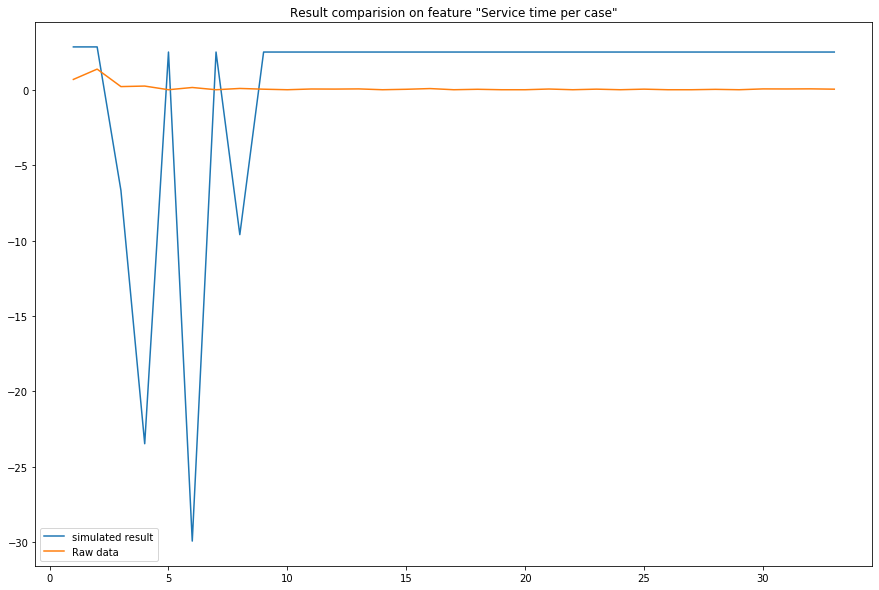

In [33]:
plt.figure(figsize=(15,10))
plt.plot(stocks['TIME'],stocks['Service time per case'], label='simulated result')
# plt.plot(stocks['TIME'],dummy_stock['Service time per case'],label = 'dummy result')
plt.plot(stocks['TIME'],df['Service time per case1H'], label='Raw data')
plt.title('Result comparision on feature "Service time per case"')
plt.legend()
plt.show()

In [34]:
abs_error(df['Num in process case1H'],stocks['Num in process per case'])

6823.169636363636

In [35]:
# plot result
plt.figure(figsize=(15,10))
plt.plot(stocks['TIME'],stocks['Num in process per case'],label='simulated result')
# plt.plot(stocks['TIME'],dummy_stock['Num in process per case'],label='dummy result')
plt.plot(stocks['TIME'],df['Num in process case1H'], label='raw data')
plt.title('Result comparision on feature "Num in process per case"')
plt.legend()
plt.show()

In [37]:
abs_error(df['Finish rate1H'],stocks['Finish rate'])

223.34300000000002

In [36]:
plt.figure(figsize=(15,10))
plt.plot(stocks['TIME'],stocks['Finish rate'],label='simulated result')
# plt.plot(stocks['TIME'],dummy_stock['Finish rate'],label='dummy result')
plt.plot(stocks['TIME'],df['Finish rate1H'],label='Raw data')
plt.title('Result comparision on feature "Finish rate"')
plt.legend()
plt.show()

In [48]:
abs_error(df['Time in process per case7D'],stocks['Time in process per case'])

47.347075254610104

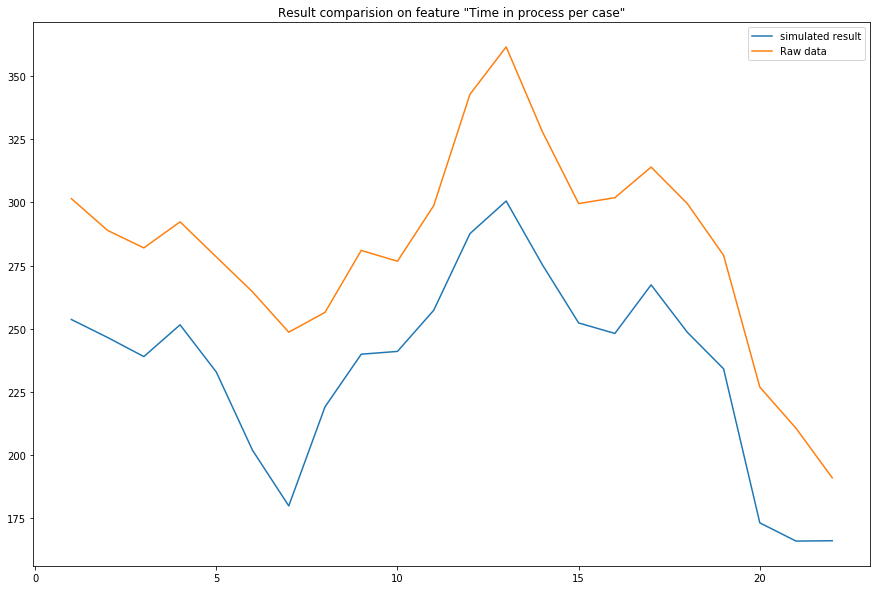

In [53]:
plt.figure(figsize=(15,10))
plt.plot(stocks['TIME'],stocks['Time in process per case'], label='simulated result')
# plt.plot(stocks['TIME'],dummy_stock['Time in process per case'],label = 'dummy result')
plt.plot(stocks['TIME'],df['Time in process per case7D'], label='Raw data')
plt.title('Result comparision on feature "Time in process per case"')
plt.legend()
plt.show()